In [0]:
import numpy as np
import matplotlib.pyplot as plt


### 1.) Review bias/variance dilemma.
Replicate the bias-variance-plot (bias,
variance and error vs. model complexity) given in Figure 4.6 in the textbook
or in lecture notes [W04.pdf, pg.52]. For this:

* Generate 20 values {$x^t$} from the range [0, 5] from uniform distribution.  
* Generate 100 different samples $X_s$. Each sample contains 20 instances {$x^t, y^t_s$} where $y^t_s = f(x^t) + \epsilon$, $f(x) =2× sin(1.5 × x)$, and $ \epsilon ∼ N (0, 1)$.
* For each sample, fit polynomial models of order 1,3, and 5.
* Plot bias, variance and error of these models.

<function matplotlib.pyplot.show>

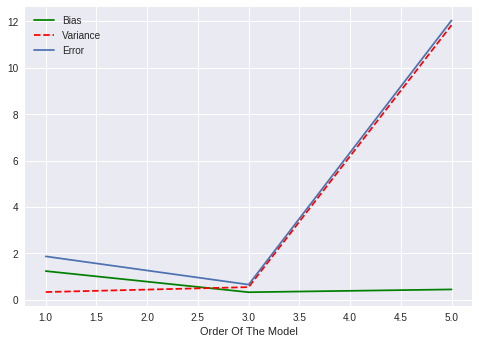

In [0]:
def BuildModel(x,y,order_of_model):
  d = np.ones_like(x).T
  for j in range(order_of_model):
    tmp_array = x**(j+1)
    d = np.concatenate((d, tmp_array.T), axis=1)
  w = np.linalg.inv(np.dot(d.T,d))
  w = np.dot(w, d.T)
  w = np.dot(w,y.T)
  return w


def BuildXMatrix(x,order_of_model):
  x_new = np.ones_like(x);
  for i in range(1,order_of_model+1):
    x_new = np.concatenate((x_new,x**i), axis = 0)
  return x_new
  
  
def CalculateBias(x, y, model, order_of_model, sample_size):
  x_new = BuildXMatrix(x, order_of_model)
  g_x = np.dot(model.T,x_new)
  bias_square = np.sum(np.square(g_x - y[0])) / sample_size;
  return bias_square**(1/2.0)


def CalculateVariance(x, y, w, order_of_model, num_of_samples, sample_size):
    mean = np.sum(w, axis=1) / num_of_samples;
    mean = np.reshape(mean, (order_of_model+1,1))
    x_new = BuildXMatrix(x, order_of_model)
    diff = np.dot(w.T, x_new) - np.dot(mean.T, x_new)
    diff_square = np.square(diff)
    sum_row = np.sum(diff_square, axis=0)
    var = np.sum(sum_row) / (num_of_samples * sample_size)
    return var
  
  
N=20

for i in range(100):
  x = np.random.uniform(0,5,(1,N))
  y = 2*np.sin(1.5*x) 
  y_noisy = y + np.random.normal(0.0, 1.0, N)
  if i == 0:
    W1_array = BuildModel(x,y_noisy,1)
    W3_array = BuildModel(x,y_noisy,3)
    W5_array = BuildModel(x,y_noisy,5)
  else:
    W1_array = np.concatenate((W1_array, BuildModel(x,y_noisy,1)), axis = 1)
    W3_array = np.concatenate((W3_array, BuildModel(x,y_noisy,3)), axis = 1)
    W5_array = np.concatenate((W5_array, BuildModel(x,y_noisy,5)), axis = 1)
  
model1 = np.sum(W1_array, axis=1) / 100;
model1 = np.reshape(model1, (2,1))
model3 = np.sum(W3_array, axis=1) / 100;
model3 = np.reshape(model3, (4,1))
model5 = np.sum(W5_array, axis=1) / 100;
model5 = np.reshape(model5, (6,1))

bias1 = CalculateBias(x,y,model1,1,N)
bias3 = CalculateBias(x,y,model3,3,N)
bias5 = CalculateBias(x,y,model5,5,N)
plt.plot([1,3,5],[bias1,bias3,bias5], 'g', label='Bias')

var1 = CalculateVariance(x,y,W1_array,1,100,N)
var3 = CalculateVariance(x,y,W3_array,3,100,N)
var5 = CalculateVariance(x,y,W5_array,5,100,N)
plt.plot([1,3,5],[var1,var3,var5],'r--', label='Variance')

error1 = bias1**2 + var1;
error3 = bias3**2 + var3;
error5 = bias5**2 + var5;
plt.plot([1,3,5],[error1,error3,error5], label='Error')
plt.legend()
plt.xlabel('Order Of The Model')
plt.show

### 2.) Review cross-validation.
Replicate the cross-validation error plot (training and validation error vs. model complexity plot) given in Figure 4.7 in the textbook or in lecture notes [W04.pdf, pg52]. For this:
* Generate 10 samples containing 100 instances as in part 1.
* Split each sample to training and validation sets, fit polynomial models of order 1,3, and 5.
* Plot mean training and validation error (mean square error) of each model.

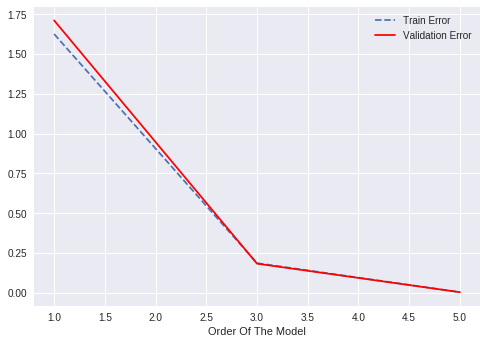

In [0]:
# Solution Here
def CalculateError(x, y, model, degree_of_model, num_of_samples, sample_size):
  x_new = BuildXMatrix(x, degree_of_model)
  x_new = np.reshape(x_new, (degree_of_model+1, num_of_samples*sample_size))
  mse = np.sum(np.square(np.dot(model.T,x_new) - y)) / (num_of_samples*sample_size)
  return mse
  

for i in range(10):
  x = np.random.uniform(0,5,(1,100))
  y = 2*np.sin(1.5*x) 
  y_noisy = y + np.random.normal(0.0, 1.0, 100)
  train_x = np.reshape(np.split(x[0],[70])[0], (1,70))
  train_y = np.reshape(np.split(y[0],[70])[0], (1,70))
  valid_x = np.reshape(np.split(x[0],[70])[1], (1,30))
  valid_y = np.reshape(np.split(y[0],[70])[1], (1,30))
  if i == 0:
    W1_array = BuildModel(train_x, train_y, 1)
    W3_array = BuildModel(train_x, train_y, 3)
    W5_array = BuildModel(train_x, train_y, 5)
    valid_X = valid_x
    valid_Y = valid_y
    train_X = train_x
    train_Y = train_y
  else:
    W1_array = np.concatenate((W1_array, BuildModel(train_x, train_y, 1)), axis = 1)
    W3_array = np.concatenate((W3_array, BuildModel(train_x, train_y, 3)), axis = 1)
    W5_array = np.concatenate((W5_array, BuildModel(train_x, train_y, 5)), axis = 1)
    valid_X = np.concatenate((valid_X,valid_x),axis=None)
    valid_Y = np.concatenate((valid_Y,valid_y),axis=None)
    train_X = np.concatenate((train_X,train_x),axis=None)
    train_Y = np.concatenate((train_Y,train_y),axis=None)

model1 = np.sum(W1_array, axis=1) / 10;
model1 = np.reshape(model1, (2,1))
model3 = np.sum(W3_array, axis=1) / 10;
model3 = np.reshape(model3, (4,1))
model5 = np.sum(W5_array, axis=1) / 10;
model5 = np.reshape(model5, (6,1))
train_error1 = CalculateError(train_X, train_Y, model1, 1, 10, 70)
train_error3 = CalculateError(train_X, train_Y, model3, 3, 10, 70)
train_error5 = CalculateError(train_X, train_Y, model5, 5, 10, 70)
valid_error1 = CalculateError(valid_X, valid_Y, model1, 1, 10, 30)
valid_error3 = CalculateError(valid_X, valid_Y, model3, 3, 10, 30)
valid_error5 = CalculateError(valid_X, valid_Y, model5, 5, 10, 30)

plt.plot([1,3,5],[train_error1, train_error3, train_error5], '--', label='Train Error')
plt.plot([1,3,5],[valid_error1, valid_error3, valid_error5], 'r', label='Validation Error')
plt.legend()
plt.xlabel('Order Of The Model')
plt.show()

### 3.) Use of real dataset. 
Download Iris Data Set from UCI Machine Learning Repository. Randomly split it into training and test sets.
* For each feature, plot histogram of classes. For better visualiziation, plot classes in same plot but with different colors. (For this you can use plt.subplots)
* Consider only two classes: Iris Setosa and Iris Versicolour.
* Assuming Gaussian distribution, apply parametric classification, and find which particular feature (sepal length, sepal width, petal length, petal width) is most successful in classifying instances.
    - For this, treat each feature separately. find maximum likelihood estimate of the parameters $(μ, σ^2)$ of different classes using training set. (You can use plt.errorbar for visualization, use one column for each feature and visualize both classes in same plot using different colors).
    - Using these parameters, predict the classes of the instances in the test set, and calculate the error.

In [0]:
# Solution Here
file = open('iris_.txt', 'r')
data_file = file.readlines()
data = np.array([])
data_class = np.array([])

for line in data_file:
  words = line.split()
  numbers = list(map(float, words[:4]))
  data_class = np.concatenate((data_class, words[4]), axis = None)
  data = np.concatenate((data,numbers), axis = 0)
  
data = np.reshape(data, (150,4))
data_class = np.reshape(data_class, (150,1))
class_setosa = data[data_class[:,0]=="Iris-setosa",0:]
class_versicolor = data[data_class[:,0]=="Iris-versicolor",0:] 
class_virginica = data[data_class[:,0]=="Iris-virginica",0:] 

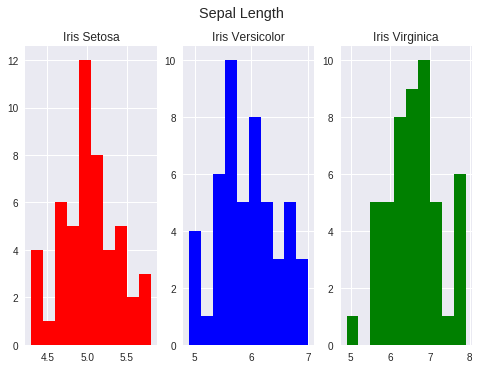

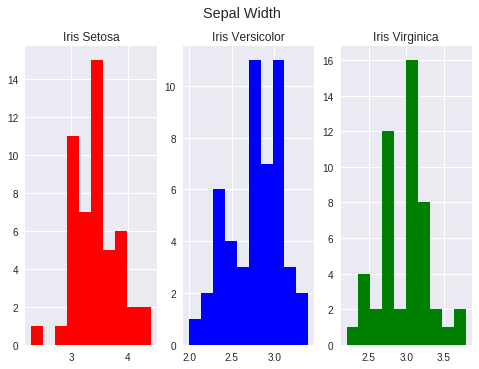

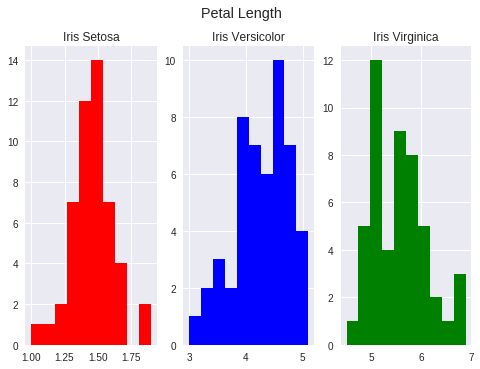

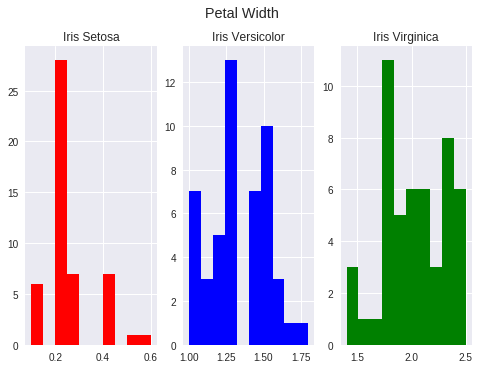

In [0]:
# Histogram of classes for each feature
fig1 = plt.figure()
fig1.suptitle('Sepal Length')
seto = plt.subplot(1,3,1)
seto.set_title('Iris Setosa')
plt.hist(class_setosa.T[0], bins = 10, color = 'red')
vers = plt.subplot(1,3,2)
vers.set_title('Iris Versicolor')
plt.hist(class_versicolor.T[0], bins = 10, color = 'blue')
virg = plt.subplot(1,3,3)
virg.set_title('Iris Virginica')
plt.hist(class_virginica.T[0], bins = 10, color = 'green')
fig2 = plt.figure()
fig2.suptitle('Sepal Width')
seto = plt.subplot(1,3,1)
seto.set_title('Iris Setosa')
plt.hist(class_setosa.T[1], bins = 10, color = 'red')
vers = plt.subplot(1,3,2)
vers.set_title('Iris Versicolor')
plt.hist(class_versicolor.T[1], bins = 10, color = 'blue')
virg = plt.subplot(1,3,3)
virg.set_title('Iris Virginica')
plt.hist(class_virginica.T[1], bins = 10, color = 'green')
fig3 = plt.figure()
fig3.suptitle('Petal Length')
seto = plt.subplot(1,3,1)
seto.set_title('Iris Setosa')
plt.hist(class_setosa.T[2], bins = 10, color = 'red')
vers = plt.subplot(1,3,2)
vers.set_title('Iris Versicolor')
plt.hist(class_versicolor.T[2], bins = 10, color = 'blue')
virg = plt.subplot(1,3,3)
virg.set_title('Iris Virginica')
plt.hist(class_virginica.T[2], bins = 10, color = 'green')
fig4 = plt.figure()
fig4.suptitle('Petal Width')
seto = plt.subplot(1,3,1)
seto.set_title('Iris Setosa')
plt.hist(class_setosa.T[3], bins = 10, color = 'red')
vers = plt.subplot(1,3,2)
vers.set_title('Iris Versicolor')
plt.hist(class_versicolor.T[3], bins = 10, color = 'blue')
virg = plt.subplot(1,3,3)
virg.set_title('Iris Virginica')
plt.hist(class_virginica.T[3], bins = 10, color = 'green')
plt.show()

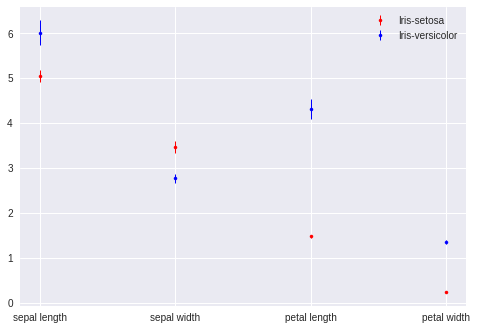

In [0]:
#Training
train_setosa = data[data_class[:,0]=="Iris-setosa", 0:][0:35]
train_vers = data[data_class[:,0]=="Iris-versicolor", 0:][0:35]
mean_set = np.sum(train_setosa, axis=0) / 35
mean_vers = np.sum(train_vers, axis=0) / 35
var_set = np.sum(np.square(train_setosa - mean_set), axis=0) / 35
var_vers = np.sum(np.square(train_vers - mean_vers), axis=0) / 35
plt.errorbar(["sepal length","sepal width","petal length","petal width"], mean_set, yerr=var_set,  fmt='.', color='red', ecolor='red', elinewidth=1, label='Iris-setosa')
plt.errorbar(["sepal length","sepal width","petal length","petal width"], mean_vers, yerr=var_vers, fmt='.', color='blue', ecolor='blue', elinewidth=1, label='Iris-versicolor')
plt.legend(loc='best')
plt.show()

In [0]:
#Testing
test_data = np.concatenate((data[data_class[:,0]=='Iris-setosa', 0:][35:50], data[data_class[:,0]=='Iris-versicolor', 0:][35:50]), axis=0)
test_class = np.concatenate((data_class[data_class[:,0]=='Iris-setosa', 0:][35:50], data_class[data_class[:,0]=='Iris-versicolor', 0:][35:50]), axis=0)
g_set = -1 * np.log(np.sqrt(var_set)) - np.square(test_data-mean_set) / (2*var_set)
g_vers = -1 * np.log(np.sqrt(var_vers)) - np.square(test_data-mean_vers) / (2*var_vers)
predictions = g_set < g_vers
predictions = np.where(predictions[:][:]==False, 'Iris-setosa', predictions)
predictions = np.where(predictions[:][:]=='True', 'Iris-versicolor', predictions) 
error= [(np.sum([0 if predictions[i][k]==test_class[i] else 1 for i in range(30)]) / 30.0) for k in range(4)] # error percentage
print 'Error rates for each feature: '
print 'Sepal length {e[0]}, Sepal width {e[1]}, Petal length {e[2]}, Petal width {e[3]}'.format(e = error)

Error rates for each feature: 
Sepal length 0.133333333333, Sepal width 0.166666666667, Petal length 0.0, Petal width 0.0


Petal length and petal width are the most successful ones for classifying the data. 